In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import ensemble
from matplotlib import style
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

style.use('fivethirtyeight')
%matplotlib inline

TEST_DATASET_PATH = 'test.csv'
TRAIN_DATASET_PATH = 'train.csv'

test_data = pd.read_csv(TEST_DATASET_PATH)
train_data = pd.read_csv(TRAIN_DATASET_PATH)

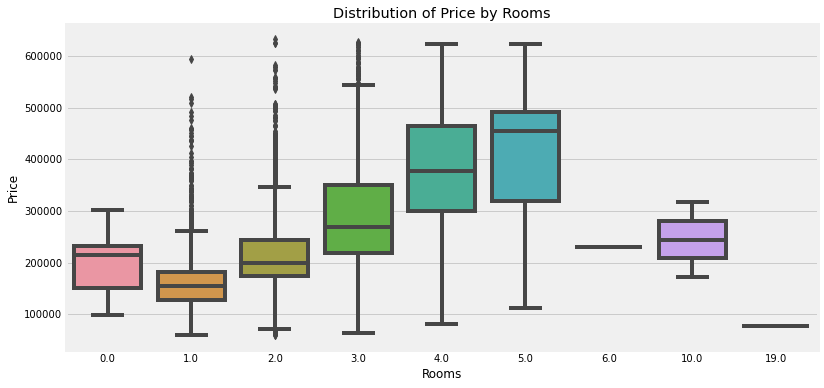

In [10]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(train_data['Rooms'], train_data['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Distribution of Price by Rooms')
plt.show();

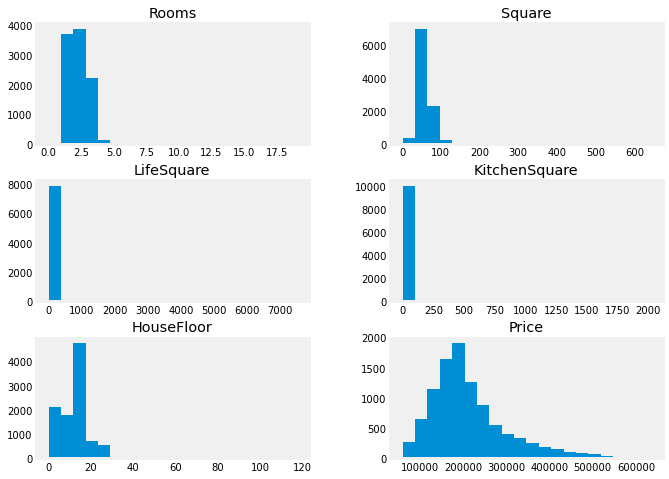

In [11]:
# отбираем количественные признаки
df_num_features = train_data.select_dtypes(include='float64')

# Удаляем малозначащие столбцы
num_features = pd.DataFrame(df_num_features)
num_features.drop("Ecology_1", axis=1, inplace=True)
num_features.drop("Healthcare_1", axis=1, inplace=True)
num_features.hist(figsize=(10, 8), bins=20, grid=False);

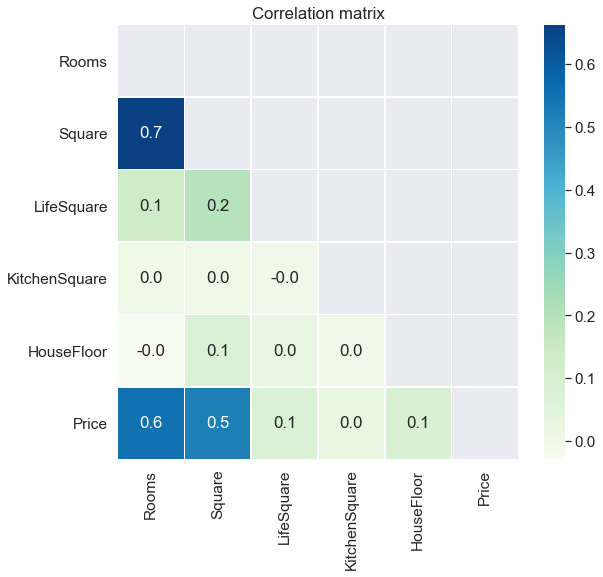

In [12]:
corr = num_features.corr()
plt.figure(figsize = (8, 8))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(num_features.corr(), mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show();

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [14]:
train_data = train_data.sort_values('Price')
test_data = test_data.sort_values('DistrictId')
train_data = train_data.fillna(method='pad')
test_data = test_data.fillna(method='pad')

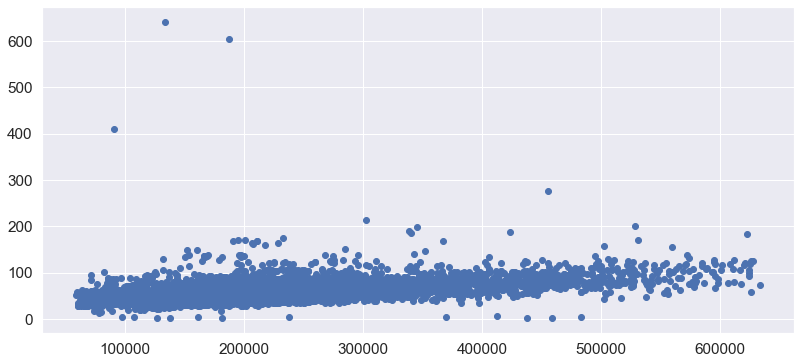

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6  # меняем размер графиков по умолчанию

plt.scatter(train_data.Price, train_data.Square)

In [16]:
X_train = pd.get_dummies(train_data)
X_train.drop("Price", axis=1, inplace=True)
X_train.drop("Id", axis=1, inplace=True)
y_train = train_data.Price

model1 = ensemble.GradientBoostingRegressor(n_estimators=442, max_depth=5, min_samples_split=2,
                                           learning_rate=0.1, loss='ls', random_state=42)

model2 = RandomForestRegressor(n_estimators=1442, max_depth=18, random_state=42, max_features=7)

model = VotingRegressor([('model1', model1), ('model2', model2)])

model.fit(X_train, y_train)

VotingRegressor(estimators=[('model1',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=442,
                                                       random_state=42)),
                            ('model2',
                             RandomForestRegressor(max_depth=18, max_features=7,
                                                   n_estimators=1442,
                                                   random_state=42))])

In [17]:
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["Price"] = model.predict(X_test)
test_data.loc[:, ['Id', 'Price']].to_csv('Goremykina.csv', index=False)